In [1]:
%matplotlib inline
import torch
import tools as tl

In [2]:
torch.set_printoptions(2)

In [3]:
img = tl.plt.imread('../data/catdog.jpg')
h, w = img.shape[:2]
print(h, w)
X = torch.rand(size=(1, 3, h, w))
Y = tl.multibox_prior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape

235 310


torch.Size([1, 364250, 4])

In [4]:
boxes = Y.reshape(h, w, 5, 4)
boxes[115, 115, 0, :]

tensor([0.09, 0.12, 0.66, 0.87])

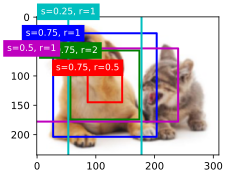

In [7]:
tl.set_figsize()
bbox_scale = torch.tensor((w, h, w, h))
fig = tl.plt.imshow(img)
tl.show_bboxes(fig.axes, boxes[115, 115, :, :] * bbox_scale,
               ['s=0.75, r=1', 's=0.75, r=2', 's=0.75, r=0.5', 's=0.5, r=1', 's=0.25, r=1'])
tl.plt.show()

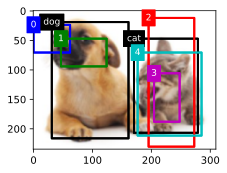

In [9]:
ground_truth = torch.tensor([[0, 0.1, 0.08, 0.52, 0.92],
                             [1, 0.55, 0.2, 0.9, 0.88]])
anchors = torch.tensor([[0, 0.1, 0.2, 0.3], [0.15, 0.2, 0.4, 0.4],
                        [0.63, 0.05, 0.88, 0.98], [0.66, 0.45, 0.8, 0.8],
                        [0.57, 0.3, 0.92, 0.9]])
fig = tl.plt.imshow(img)
tl.show_bboxes(fig.axes, ground_truth[:, 1:] * bbox_scale, ['dog', 'cat'], 'k')
tl.show_bboxes(fig.axes, anchors * bbox_scale, ['0', '1', '2', '3', '4'])
tl.plt.show()

In [ ]:
labels = tl.multibox_target(anchors.unsqueeze(dim=0),
                            ground_truth.unsqueeze(dim=0))

In [ ]:
labels[2], labels[1], labels[0]

In [ ]:
anchors = torch.tensor([[0.1, 0.08, 0.52, 0.92], [0.08, 0.2, 0.56, 0.95],
                        [0.15, 0.3, 0.62, 0.91], [0.55, 0.2, 0.9, 0.88]])
offset_preds = torch.tensor([0] * anchors.numel())
cls_probs = torch.tensor([[0] * 4,  
                          [0.9, 0.8, 0.7, 0.1],  
                          [0.1, 0.2, 0.3, 0.9]])  

In [ ]:
fig = tl.plt.imshow(img)
tl.show_bboxes(fig.axes, anchors * bbox_scale,
               ['dog=0.9', 'dog=0.8', 'dog=0.7', 'cat=0.9'])
tl.plt.show()

In [ ]:
output = tl.multibox_detection(cls_probs.unsqueeze(dim=0),
                               offset_preds.unsqueeze(dim=0),
                               anchors.unsqueeze(dim=0),
                               nms_threshold=0.5)
output

In [ ]:
fig = tl.plt.imshow(img)
for i in output[0].detach().numpy():
    if i[0] == -1:
        continue
    label = ('dog=', 'cat=')[int(i[0])] + str(i[1])
    tl.show_bboxes(fig.axes, [torch.tensor(i[2:]) * bbox_scale], label)
tl.plt.show()